In [37]:
from sklearn import linear_model
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import  train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
data = pd.read_csv('age_gender.csv')

In [39]:
data.head()

,age,ethnicity,gender,img_name,pixels
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [40]:
df3 = pd.DataFrame(columns = ['Age_Range'])
df3

,Age_Range


In [41]:
ages = data['age'].tolist()

In [42]:
count = 0
for i in ages:
    i = int(i)
    if i == 0 or i == 1 or i == 2 or i == 3:
        df3.loc[count] = '0-3'
    elif i == 4 or i == 5 or i == 6 or i == 7:
        df3.loc[count] = '4-7'
    elif i == 8 or i == 9 or i == 10 or i == 11 or i == 12 or i == 13 or i == 14:
        df3.loc[count] = '8-14'
    elif i == 15 or i == 16 or i == 17 or i == 18 or i == 19 or i == 20 or i == 21 or i == 22 or i == 23 or i == 24:
        df3.loc[count] = '15-24'
    elif i == 25 or i == 26 or i == 27 or i == 28 or i == 29 or i == 30 or i == 31 or i == 32 or i == 33 or i == 34 or i == 35 or i == 36 or i == 37 :
        df3.loc[count] = '25-37'
    elif i == 38 or i == 39 or i == 40 or i == 41 or i == 42 or i == 43 or i == 44 or i == 45 or i == 46 or i == 47:
        df3.loc[count] = '38-47'
    elif i == 48 or i == 49 or i == 50 or i == 51 or i == 52 or i == 53 or i == 54 or i == 55 or i == 56 or i == 57 or i == 58 or i == 59:
        df3.loc[count] = '48-59'
    else: 
        df3.loc[count] = '60+'
    count += 1

In [43]:
data = pd.concat([data, df3], axis=1, join='inner')
display(data)

,age,ethnicity,gender,img_name,pixels,Age_Range
0,1,2,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...,0-3
1,1,2,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...,0-3
2,1,2,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...,0-3
3,1,2,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...,0-3
4,1,2,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...,0-3
...,...,...,...,...,...,...
23700,99,0,1,20170120221920654.jpg.chip.jpg,127 100 94 81 77 77 74 99 102 98 128 145 160 1...,60+
23701,99,1,1,20170120134639935.jpg.chip.jpg,23 28 32 35 42 47 68 85 98 103 113 117 130 129...,60+
23702,99,2,1,20170110182418864.jpg.chip.jpg,59 50 37 40 34 19 30 101 156 170 177 184 187 1...,60+
23703,99,2,1,20170117195405372.jpg.chip.jpg,45 108 120 156 206 197 140 180 191 199 204 207...,60+


In [44]:
hold = (data['pixels'][0])

In [45]:
listRes = (hold.split(" "))

In [46]:
listRes = list(map(int, listRes))

In [47]:
numpRes = np.asarray(listRes)
numpRes

array([129, 128, 128, ..., 146, 146, 146])

In [48]:
data_process = data
for i in range(len(data['pixels'])):
    hold = (data['pixels'][i])
    listRes = (hold.split(" "))
    listRes = list(map(int, listRes))
    numpRes = np.asarray(listRes)
    data_process['pixels'][i] = numpRes

C:\Users\LUCASF~1\AppData\Local\Temp/ipykernel_3332/2173583279.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_process['pixels'][i] = numpRes


In [49]:
data_process['pixels'][2]

array([ 67,  70,  71, ..., 112, 111, 108])

In [50]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data_process['pixels'], data_process['ethnicity'], test_size= 0.25, random_state=42)

In [51]:
X_train = list(X_train)

In [52]:
Y_train = list(Y_train)

In [53]:
model = linear_model.LogisticRegression(max_iter = 500)
model.fit(X_train, Y_train)

C:\Users\LucasFernandezENG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [54]:
X_test = list(X_test)

In [55]:
y_pred = model.predict(X_test)

In [56]:
list(y_pred)

[3,
 1,
 4,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 2,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 3,
 0,
 0,
 0,
 3,
 2,
 1,
 3,
 3,
 1,
 0,
 4,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 2,
 1,
 0,
 3,
 0,
 0,
 1,
 0,
 2,
 1,
 2,
 3,
 2,
 0,
 1,
 0,
 1,
 1,
 1,
 3,
 0,
 0,
 0,
 4,
 3,
 2,
 1,
 0,
 3,
 1,
 3,
 2,
 2,
 2,
 1,
 0,
 2,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 4,
 0,
 2,
 1,
 0,
 3,
 0,
 4,
 0,
 1,
 2,
 3,
 0,
 3,
 2,
 3,
 2,
 0,
 0,
 2,
 3,
 4,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 1,
 1,
 3,
 2,
 0,
 2,
 0,
 1,
 3,
 0,
 0,
 0,
 3,
 3,
 3,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 3,
 0,
 2,
 0,
 2,
 1,
 4,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 3,
 0,
 3,
 0,
 1,
 1,
 2,
 3,
 0,
 0,
 0,
 2,
 0,
 1,
 0,
 0,
 4,
 2,
 0,
 0,
 1,
 4,
 1,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 3,
 0,
 1,
 2,
 2,
 0,
 3,
 2,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 2,
 0,
 3,
 1,
 0,
 0,
 0,
 3,
 1,
 0,
 0,
 1,
 2,
 0,


In [57]:
Y_test = list(Y_test)
Y_test

[1,
 1,
 4,
 4,
 0,
 1,
 1,
 1,
 1,
 1,
 2,
 0,
 0,
 0,
 3,
 1,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 3,
 0,
 1,
 2,
 3,
 0,
 0,
 0,
 4,
 0,
 3,
 3,
 4,
 0,
 0,
 3,
 2,
 1,
 3,
 3,
 1,
 0,
 4,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 2,
 2,
 0,
 3,
 4,
 3,
 1,
 0,
 2,
 1,
 0,
 0,
 3,
 0,
 1,
 0,
 1,
 1,
 1,
 3,
 0,
 3,
 0,
 0,
 3,
 2,
 2,
 0,
 3,
 1,
 3,
 4,
 3,
 0,
 1,
 0,
 2,
 1,
 0,
 3,
 0,
 0,
 0,
 4,
 4,
 0,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 4,
 0,
 2,
 1,
 0,
 3,
 0,
 0,
 0,
 0,
 2,
 0,
 2,
 3,
 2,
 0,
 2,
 2,
 0,
 2,
 2,
 3,
 3,
 0,
 1,
 4,
 0,
 1,
 3,
 3,
 1,
 1,
 3,
 2,
 0,
 4,
 0,
 1,
 3,
 1,
 0,
 0,
 3,
 3,
 0,
 1,
 3,
 0,
 1,
 1,
 2,
 0,
 0,
 3,
 0,
 1,
 3,
 0,
 2,
 2,
 2,
 1,
 3,
 0,
 0,
 1,
 2,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 1,
 0,
 0,
 1,
 1,
 0,
 3,
 0,
 0,
 0,
 2,
 3,
 1,
 0,
 0,
 0,
 2,
 0,
 0,
 3,
 0,
 3,
 0,
 0,
 3,
 4,
 0,
 0,
 2,
 3,
 0,
 1,
 2,
 2,
 0,
 3,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 4,
 0,
 1,
 1,
 0,
 0,
 0,
 3,
 1,
 0,
 4,
 3,
 2,
 0,


In [58]:
accuracy_score(Y_test, y_pred)

0.685844440695124

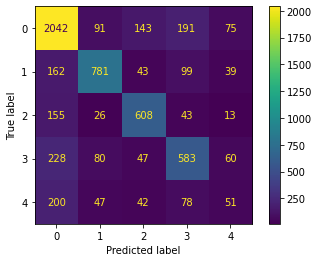

In [59]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(Y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

In [60]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data_process['pixels'], data_process['gender'], test_size= 0.25, random_state=42)

X_train = list(X_train)
Y_train = list(Y_train)



In [61]:
model = linear_model.LogisticRegression(max_iter = 500)
model.fit(X_train, Y_train)

C:\Users\LucasFernandezENG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [62]:
X_test = list(X_test)

In [63]:
y_pred = model.predict(X_test)
Y_test = list(Y_test)
accuracy_score(Y_test, y_pred)

0.8348236882065125

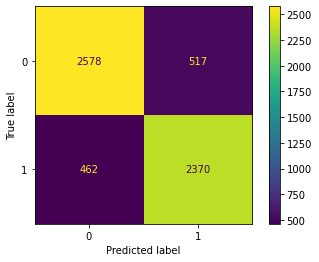

In [64]:
cm = confusion_matrix(Y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=model.classes_)
disp.plot()

plt.show()

In [65]:
(X_train, X_test, Y_train, Y_test) = train_test_split(data_process['pixels'], data_process['Age_Range'], test_size= 0.25, random_state=42)

X_train = list(X_train)
Y_train = list(Y_train)

In [66]:
model = linear_model.LogisticRegression(max_iter = 500)
model.fit(X_train, Y_train)

C:\Users\LucasFernandezENG\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=500)

In [67]:
X_test = list(X_test)
y_pred = model.predict(X_test)
Y_test = list(Y_test)
accuracy_score(Y_test, y_pred)

0.5154378268938755

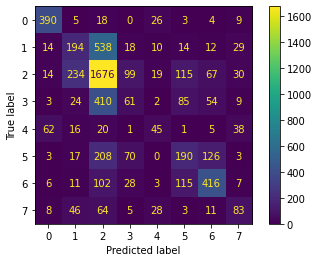

In [70]:
cm = confusion_matrix(Y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

plt.show()

In [69]:
len(data_process['pixels'][2])

2304